# Stock Hypothesis Test / Sharpe Ratio

In [51]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import tweepy
from textblob import TextBlob
import re
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
import yfinance as yf

In [142]:
a = str(input())
b = str(input())
start = today - datetime.timedelta(days=365*5)
today = datetime.datetime.strptime(datetime.datetime.now().strftime('%Y-%m-%d'), '%Y-%m-%d')
stock1 = yf.download(a, start, today)
stock2 = yf.download(b, start, today)
#Resampling to get the average percentage return 
monthly1 = stock1.resample('M').ffill().pct_change()
monthly2 = stock2.resample('M').ffill().pct_change()
#Printing out the mean monthly returns
print( a , "'s monthly average return is: ",monthly1.Open.mean())
print( b , "'s monthly average return is: ",monthly2.Open.mean())

 MMM
 DIS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
MMM 's monthly average return is:  -0.008763112211672324
DIS 's monthly average return is:  0.004478546717814505


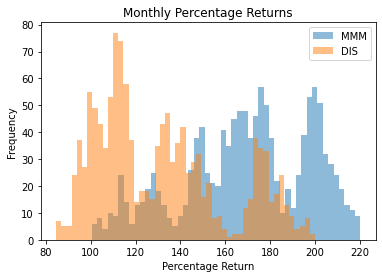

In [143]:
import matplotlib.pyplot as plt
plt.hist(stock1['Open'], bins=50, alpha=0.5, label=a)
plt.hist(stock2['Open'], bins=50, alpha=0.5, label=b)
plt.title('Monthly Percentage Returns')
plt.xlabel('Percentage Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [146]:
import statistics
print("Standard Deviation of ", a ," is: ", statistics.stdev(monthly1.Open.dropna()))
print("Sharpe ratio for ", a ," is: ", monthly1.Open.dropna().mean()/statistics.stdev(monthly1.Open.dropna()))
print("Standard Deviation of ", b ," is: ", statistics.stdev(monthly2.Open.dropna()))
print("Sharpe ratio for ", b ," is: ", monthly2.Open.dropna().mean()/statistics.stdev(monthly2.Open.dropna()))

import pandas as pd
from scipy.stats import ttest_ind

# Calculate t-statistic and p-value
t_stat, p_val = ttest_ind(monthly1['Open'].dropna(), monthly2['Open'].dropna(), equal_var=False)

# Check if the p-value is less than the significance level
if p_val < 0.05:
    print('Reject the null hypothesis. The mean monthly returns of ' ,a , ' and ' ,b , ' are not equal.')
else:
    print('Fail to reject the null hypothesis. The mean monthly returns of ' ,a , ' and ' ,b , 'are equal.')

Standard Deviation of  MMM  is:  0.06464562014106079
Sharpe ratio for  MMM  is:  -0.1355561628545084
Standard Deviation of  DIS  is:  0.09992228301982102
Sharpe ratio for  DIS  is:  0.04482030016193806
Fail to reject the null hypothesis. The mean monthly returns of  MMM  and  DIS are equal.
